In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [2]:
df_regl = pd.read_csv(config['annot_tsv'], sep='\t')
print('%d regions loaded' % (len(df_regl),))

42245 regions loaded


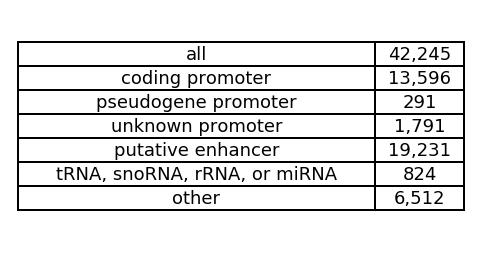

In [3]:
df_ = df_regl['annot'].value_counts()[config['annot']]
#df_.to_csv('annot_Apr27/Fig2B_annot_counts_table.tsv', sep='\t')

df_fmt_ = df_.map(yp.f_uk)
df_fmt_['all'] = yp.f_uk(sum(df_))
df_fmt_ = df_fmt_[['all', 'coding_promoter', 'pseudogene_promoter', 'unknown_promoter', 'putative_enhancer', 
                   'non-coding_RNA', 'other_element']]
df_fmt_.index = ['all', 'coding promoter', 'pseudogene promoter', 'unknown promoter', 'putative enhancer',
                'tRNA, snoRNA, rRNA, or miRNA', 'other']

fig = plt.figure(figsize=(4,2))
plt.subplot(111, frame_on=False) 
plt.gca().xaxis.set_visible(False) 
plt.gca().yaxis.set_visible(False)
plt.table(cellText=list(zip(df_fmt_.index, df_fmt_.values)), 
          loc='center', cellLoc = 'center', rowLoc = 'center', fontsize=20, colWidths=[0.8, 0.2])
plt.savefig('annot_Apr27/Fig2B_annot_counts_table.pdf', bbox_inches='tight')

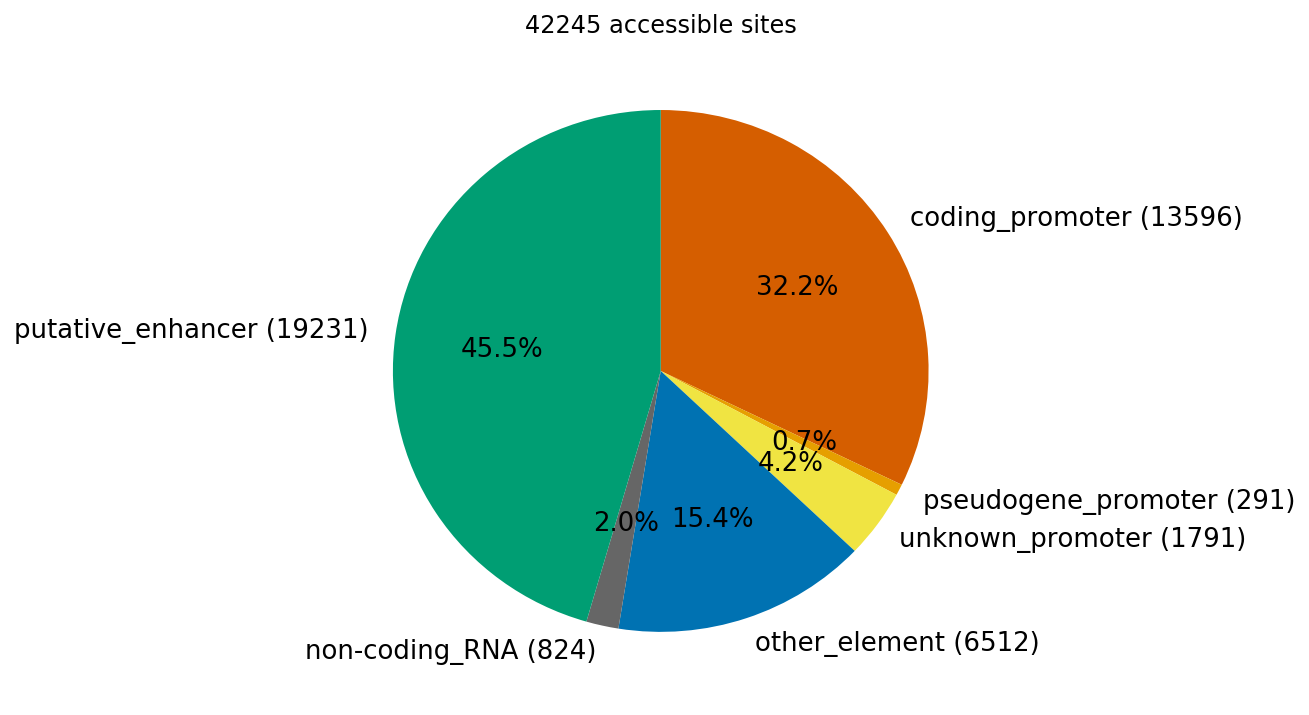

In [4]:
d_ = collections.OrderedDict([
    ('coding_promoter', yp.RED),
    ('pseudogene_promoter', yp.ORANGE),
    ('unknown_promoter', yp.YELLOW),
    ('other_element', yp.BLUE),
    ('non-coding_RNA', '0.4'),
    ('putative_enhancer', yp.GREEN),
])

df_ = df_regl['annot'].value_counts()[d_.keys()]

pd.Series(data=df_.values, index=['%s (%d)' % (label, counts) for label, counts in zip(df_.index, df_.values)]).plot(
    title='%d accessible sites' % (len(df_regl),),
    kind='pie',
    figsize=(6,6),
    label='', 
    colors=d_.values(),
    counterclock=False,
    autopct='%.1f%%',
    startangle=90,
    fontsize=13,
)
#plt.savefig('annot_Apr27/Fig2B_pie_raw_text.pdf', bbox_inches='tight')

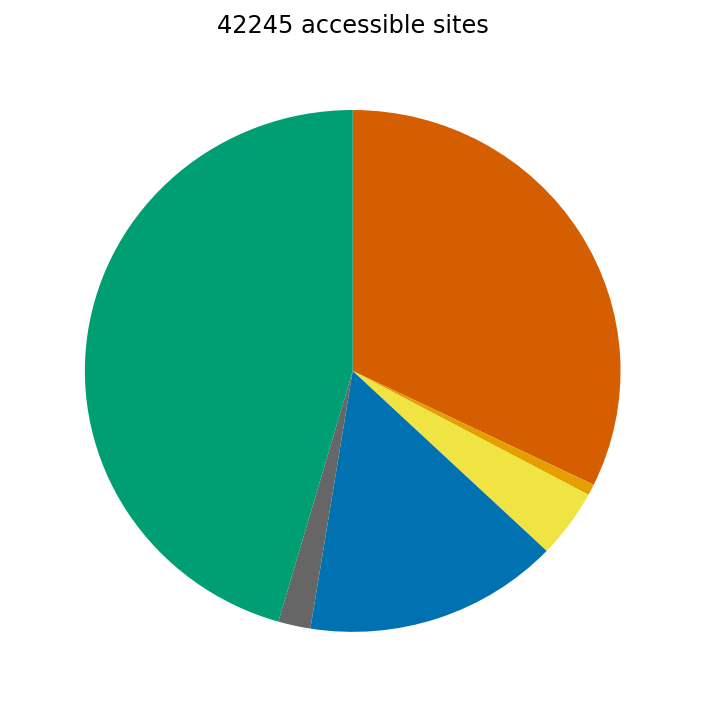

In [5]:
pd.Series(data=df_.values, index=['' for label, counts in zip(df_.index, df_.values)]).plot(
    title='%d accessible sites' % (len(df_regl),),
    kind='pie',
    figsize=(6,6),
    label='', 
    colors=d_.values(),
    counterclock=False,
    startangle=90,
    fontsize=13,
)
#plt.savefig('annot_Apr27/Fig2B_pie_only.pdf', bbox_inches='tight')

In [6]:
n_txn_elong = df_[['coding_promoter', 'pseudogene_promoter', 'unknown_promoter']].sum()
print('%d of %d sites with txn elongation: %.1f%%' % (n_txn_elong, len(df_regl), 100.0*n_txn_elong / len(df_regl)))

15678 of 42245 sites with txn elongation: 37.1%


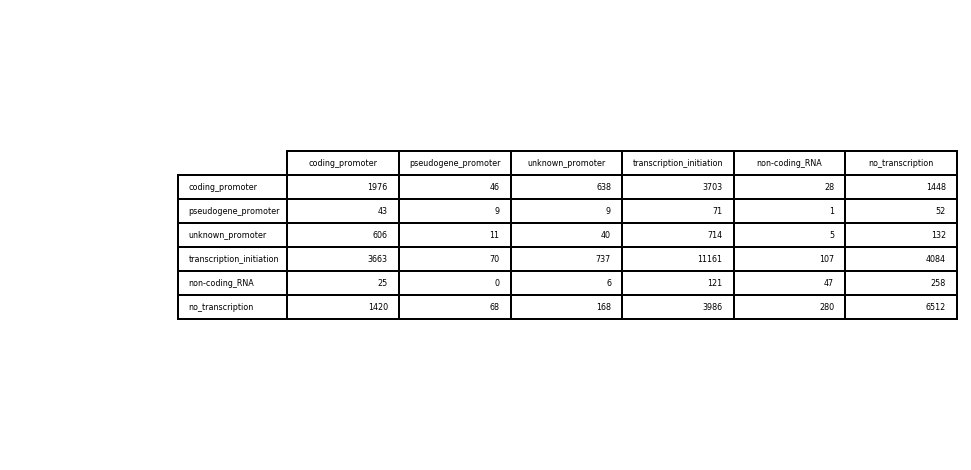

In [7]:
df_ = pd.crosstab(\
    pd.Categorical(df_regl['annot_fwd']),\
    pd.Categorical(df_regl['annot_rev']))\
.loc[config['annot_strand'], config['annot_strand']]

plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_, ax=plt.gca(), loc='center left')
#plt.savefig('annot/FigA_mapping/annot_crosstab.pdf', bbox_inches='tight')

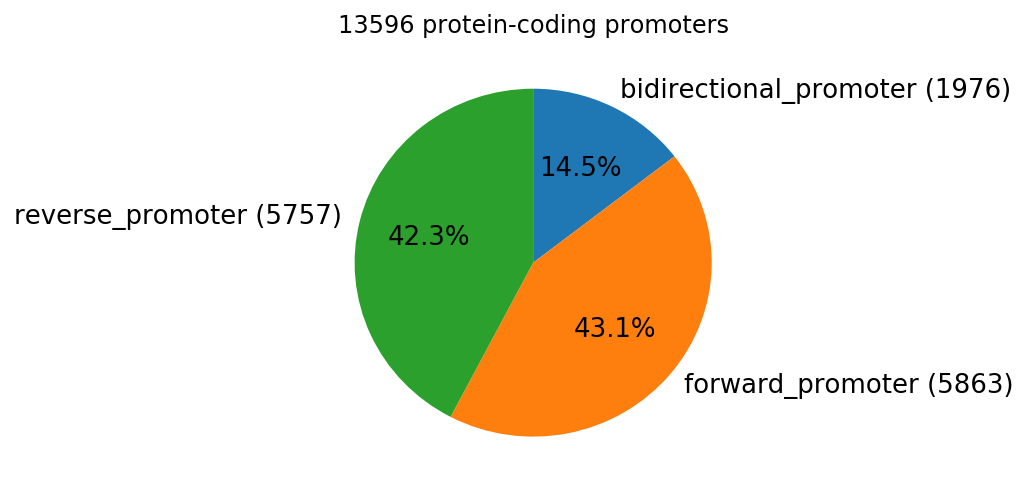

In [8]:
def prom_type_(ir):
    if (ir[1]['annot_fwd'] == "coding_promoter") and (ir[1]['annot_rev'] == "coding_promoter"):
        return 'bidirectional_promoter'
    elif (ir[1]['annot_fwd'] == "coding_promoter"):
        return 'forward_promoter'
    elif (ir[1]['annot_rev'] == "coding_promoter"):
        return 'reverse_promoter'

l_ = list(filter(lambda t_: not(t_ is None), map(prom_type_, df_regl.iterrows())))
l_ptype_ = ['bidirectional_promoter', 'forward_promoter', 'reverse_promoter']
df_ = pd.Series(l_).value_counts()[l_ptype_]
df_.to_csv('annot/FigA_mapping/coding_promoter_by_type.tsv', header=False, sep='\t')

pd.Series(data=df_.values, index=['%s (%d)' % (label, counts) for label, counts in zip(df_.index, df_.values)]).plot(
    title='%d protein-coding promoters' % (len(l_),),
    figsize=(4,4),
    kind='pie',
    counterclock=False,
    autopct='%.1f%%',
    startangle=90,
    label='', 
    fontsize=13,
)
#plt.savefig('annot/FigA_mapping/coding_promoter_by_type.pdf', bbox_inches='tight')

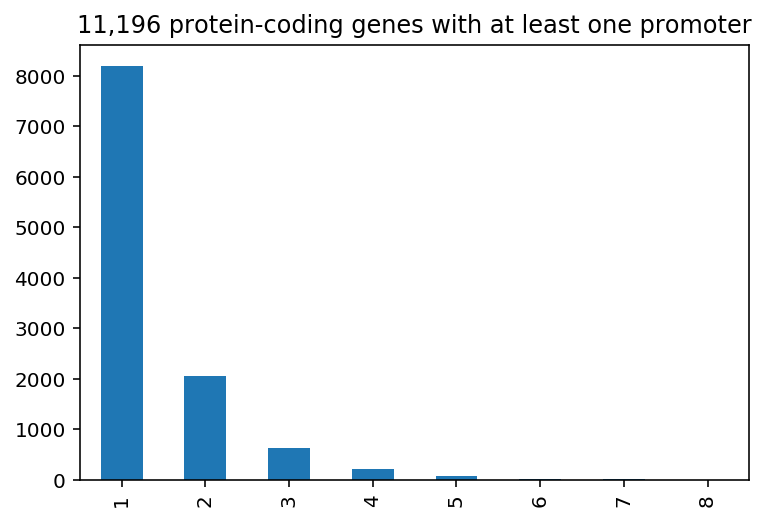

In [39]:
l_ = list(df_regl.query('annot_fwd == "coding_promoter"')['promoter_gene_id_fwd'])\
   + list(df_regl.query('annot_rev == "coding_promoter"')['promoter_gene_id_rev'])
df_ = pd.Series(list(filter(lambda gene_id: gene_id != '.', l_))).value_counts().value_counts()
df_.plot(
    kind='bar',
    figsize=(6,4),
    title='%s protein-coding genes with at least one promoter' % (yp.f_uk(sum(df_.values)),),
)

#df_.to_csv('annot/FigA_mapping/promoters_per_gene_raw.tsv', header=False, sep='\t')
#plt.savefig('annot/FigA_mapping/promoters_per_gene_raw.pdf', bbox_inches='tight')

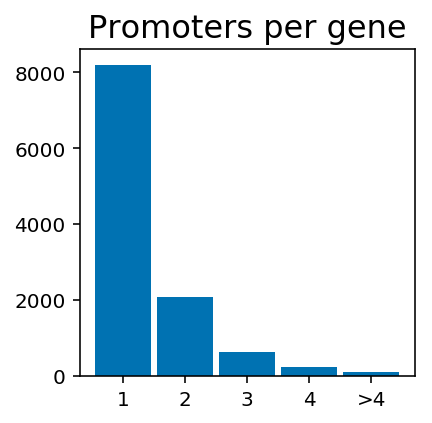

In [40]:
df_cut_ = df_[:4]
df_cut_['>4'] = sum(df_[4:].values)
assert sum(df_.values) == sum(df_cut_.values)
df_cut_.to_csv('annot_Apr27/Fig2C_coding_promoters_per_gene.tsv', header=False, sep='\t')

df_cut_.plot(
    kind='bar',
    figsize=(3,3),
    #title='%s protein-coding genes with at least one promoter' % (yp.f_uk(sum(df_.values)),),
    title='Promoters per gene',
    rot=0,
    width=0.9,
    color=yp.BLUE,
)
plt.gca().title.set_size(16)
plt.savefig('annot_Apr27/Fig2C_coding_promoters_per_gene.pdf', bbox_inches='tight', transparent=True)

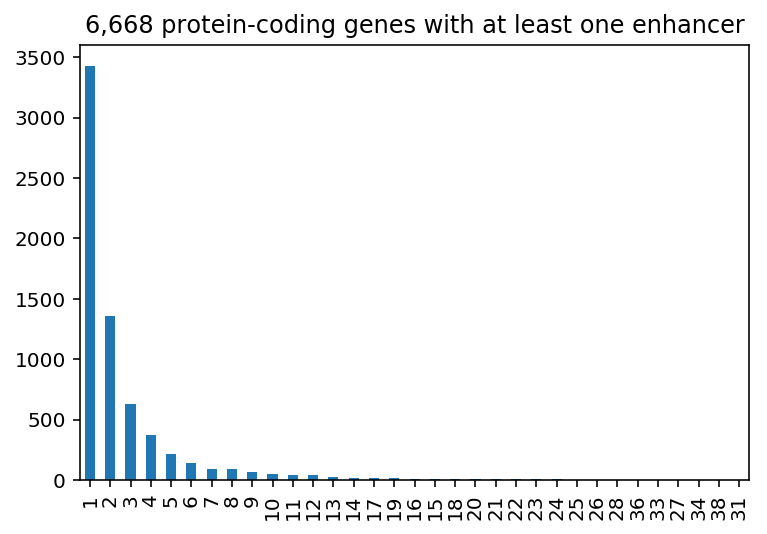

In [42]:
l_ = list(df_regl.query('annot == "putative_enhancer"')['associated_gene_id'])
s_ = pd.Series(list(itertools.chain(*list([l_i_.split(',') for l_i_ in filter(lambda gene_id: gene_id != '.', l_)]))))
df_ = s_.value_counts().value_counts()
df_.plot(
    kind='bar',
    figsize=(6,4),
    title='%s protein-coding genes with at least one enhancer' % (yp.f_uk(sum(df_.values)),),
)
#plt.savefig('annot/FigA_mapping/enhancers_per_gene_raw.pdf', bbox_inches='tight')

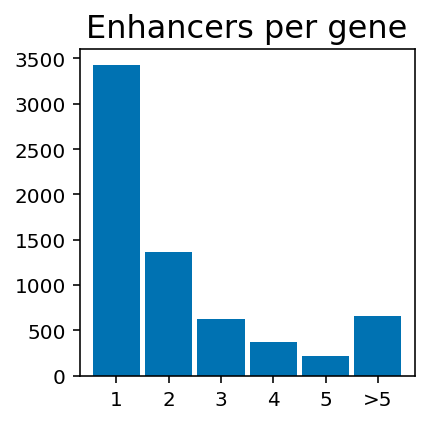

In [43]:
df_cut_ = df_[:5]
df_cut_['>5'] = sum(df_[5:].values)
assert sum(df_.values) == sum(df_cut_.values)
df_cut_.to_csv('annot_Apr27/Fig2C_enhancers_per_gene.tsv', header=False, sep='\t')

df_cut_.plot(
    kind='bar',
    figsize=(3,3),
    #title='%s protein-coding genes with at least one enhancer' % (yp.f_uk(sum(df_.values)),),
    title='Enhancers per gene',
    rot=0,
    width=0.9,
    color=yp.BLUE,
)
plt.gca().title.set_size(16)
plt.savefig('annot_Apr27/Fig2C_enhancers_per_gene.pdf', bbox_inches='tight', transparent=True)